In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [7]:
!pip install yellowbrick

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

In [9]:
df_ = pd.read_excel('neosx.xlsx')
df = df_.copy()

In [10]:
df.head()

,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,soru11,soru12,soru13,soru14,soru15,soru16
0,lisans,5,Online kurslar ve eğitim platformları,Canlı quizler,Yapay Zeka ve Makine Öğrenimi,5,5,SQL,5,Mobil Uygulama Geliştirme,Microsoft Azure,5,5,Coursera,Sosyal medyada trendleri takip ederek,5
1,Lisans,3,Sosyal medya ve profesyonel ağlar,Proje tabanlı öğrenme,Yapay Zeka ve Makine Öğrenimi,4,2,Python,5,Mobil Uygulama Geliştirme,Google Cloud,5,3,FreeCodeCamp,reklam,4
2,Doktora programı,5,Sosyal medya ve profesyonel ağlar,Haftalık veya günlük ödevler,Yazılım Test Otomasyonu,5,4,C#,5,Yazılım Test Otomasyonu,Amazon Web Services (AWS),5,4,Udemy,Daha yetkin eğitmenlerle çalışması,5
3,Ön lisans,4,online kurslar ve eğitim platformları,Haftalık veya günlük ödevler,Mobil Uygulama Geliştirme,4,4,Python,5,Yapay Zeka ve Makine Öğrenimi,Google Cloud,5,5,LinkedIn Learning,Yapay zeka ve makine öğrenimi gibi alanlarda e...,5
4,Yüksek lisans,5,Kitaplar ve yayınlar,Proje tabanlı öğrenme,Robotik ve Otomasyon,5,5,Spark,5,Robotik ve Otomasyon,Microsoft Azure,5,5,Coursera,TV,5


In [11]:
df.isna().sum()

soru1     0
soru2     0
soru3     0
soru4     0
soru5     0
soru6     0
soru7     0
soru8     0
soru9     0
soru10    0
soru11    0
soru12    0
soru13    0
soru14    0
soru15    0
soru16    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   soru1   30 non-null     object
 1   soru2   30 non-null     int64 
 2   soru3   30 non-null     object
 3   soru4   30 non-null     object
 4   soru5   30 non-null     object
 5   soru6   30 non-null     int64 
 6   soru7   30 non-null     int64 
 7   soru8   30 non-null     object
 8   soru9   30 non-null     int64 
 9   soru10  30 non-null     object
 10  soru11  30 non-null     object
 11  soru12  30 non-null     int64 
 12  soru13  30 non-null     int64 
 13  soru14  30 non-null     object
 14  soru15  30 non-null     object
 15  soru16  30 non-null     int64 
dtypes: int64(7), object(9)
memory usage: 3.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
soru2,30.0,4.466667,0.899553,2.0,4.0,5.0,5.0,5.0
soru6,30.0,4.666667,0.711159,2.0,5.0,5.0,5.0,5.0
soru7,30.0,4.466667,0.819307,2.0,4.0,5.0,5.0,5.0
soru9,30.0,4.733333,0.583292,3.0,5.0,5.0,5.0,5.0
soru12,30.0,4.900000,0.305129,4.0,5.0,5.0,5.0,5.0
soru13,30.0,4.733333,0.520830,3.0,5.0,5.0,5.0,5.0
soru16,30.0,4.900000,0.305129,4.0,5.0,5.0,5.0,5.0


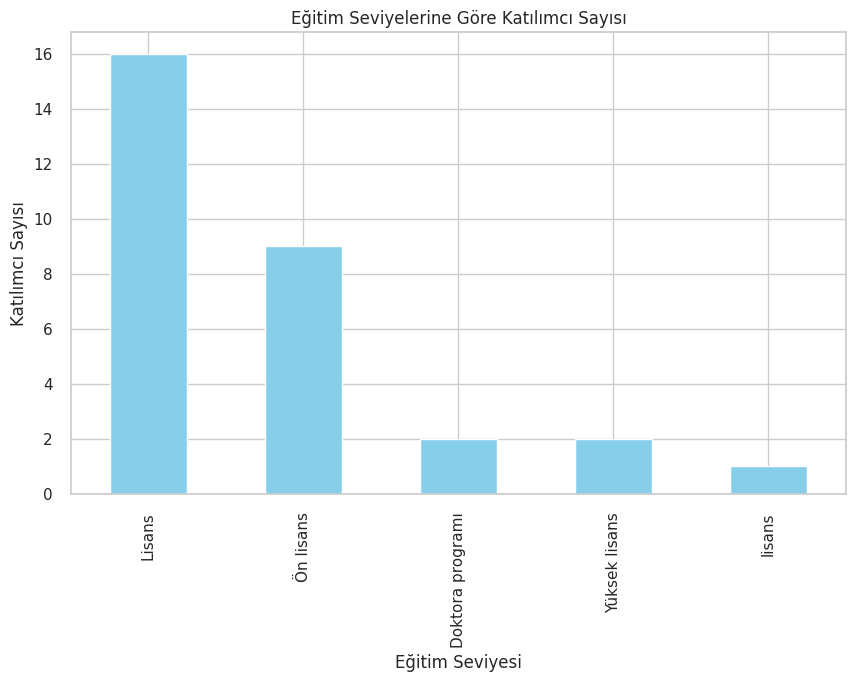

In [64]:
"""soru1 = Eğitim seviyeniz nedir?"""
soru1 = df["soru1"].value_counts()

plt.figure(figsize=(10, 6))
soru1.plot(kind='bar', color='skyblue')
plt.title('Eğitim Seviyelerine Göre Katılımcı Sayısı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Katılımcı Sayısı')
plt.show()

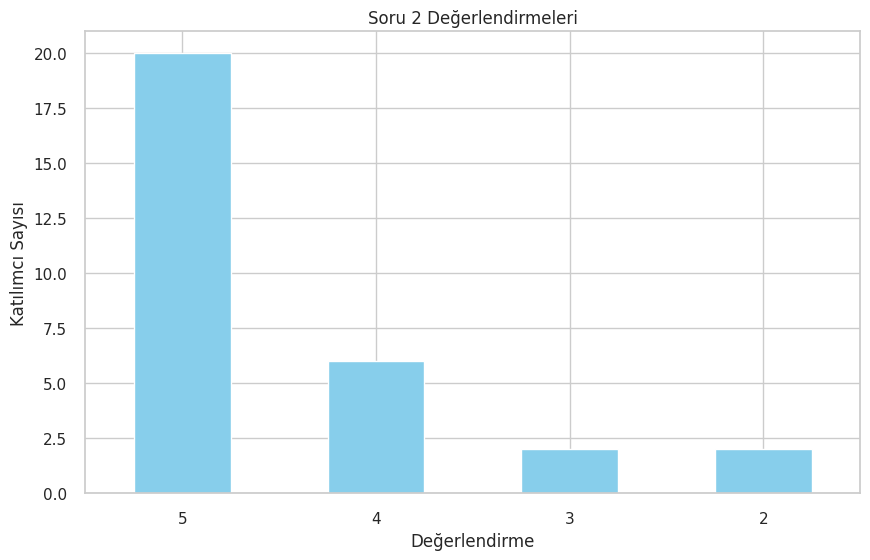

In [65]:
"""soru = 2 Web geliştirme alanında, yapay zeka destekli uygulamalarla ortak bir eğitim programı uygulanmasını ne kadar gerekli buluyorsunuz?"""

soru2 = df["soru2"].value_counts()

plt.figure(figsize=(10, 6))
soru2.plot(kind='bar', color='skyblue')
plt.title('Soru 2 Değerlendirmeleri')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()

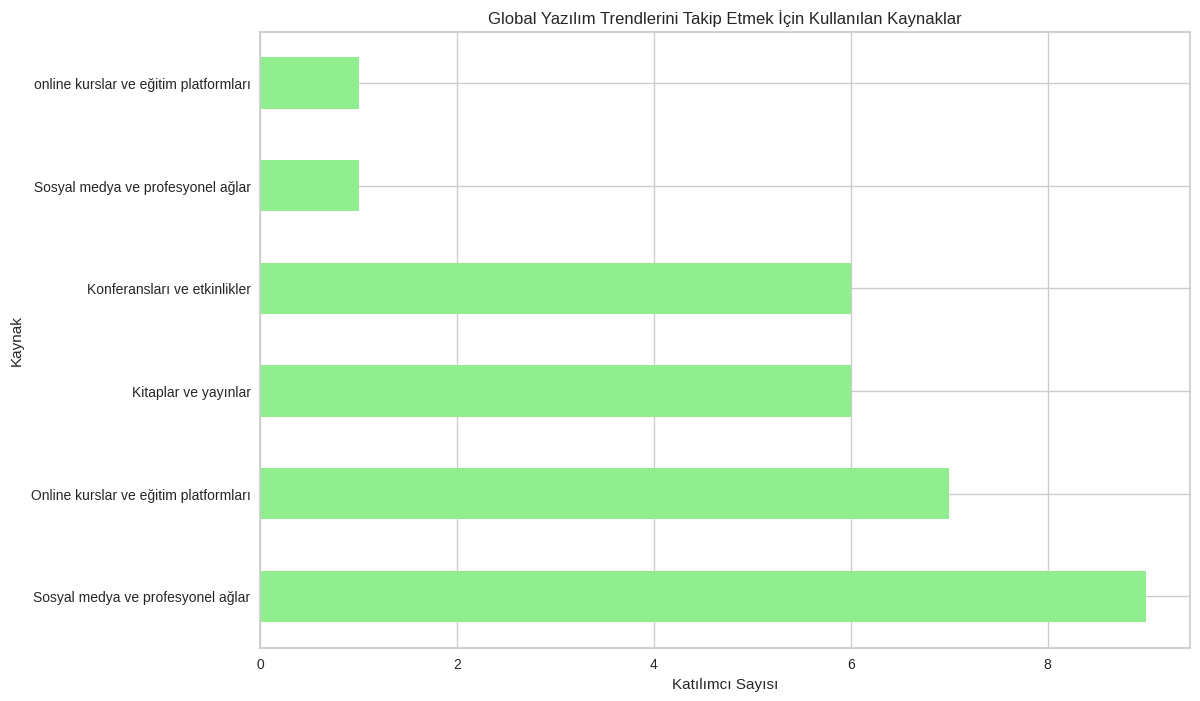

In [16]:
"""## soru 3 = Global olarak teknoloji, yazılım, yapay zeka trendlerini takip etmek ve bu konuda bilgi sahibi olmak için hangi kaynakları tercih ediyorsunuz?"""
soru3 = df["soru3"].value_counts()
plt.figure(figsize=(12, 8))
soru3.plot(kind='barh', color='lightgreen')
plt.title('Global Yazılım Trendlerini Takip Etmek İçin Kullanılan Kaynaklar')
plt.xlabel('Katılımcı Sayısı')
plt.ylabel('Kaynak')
plt.show()

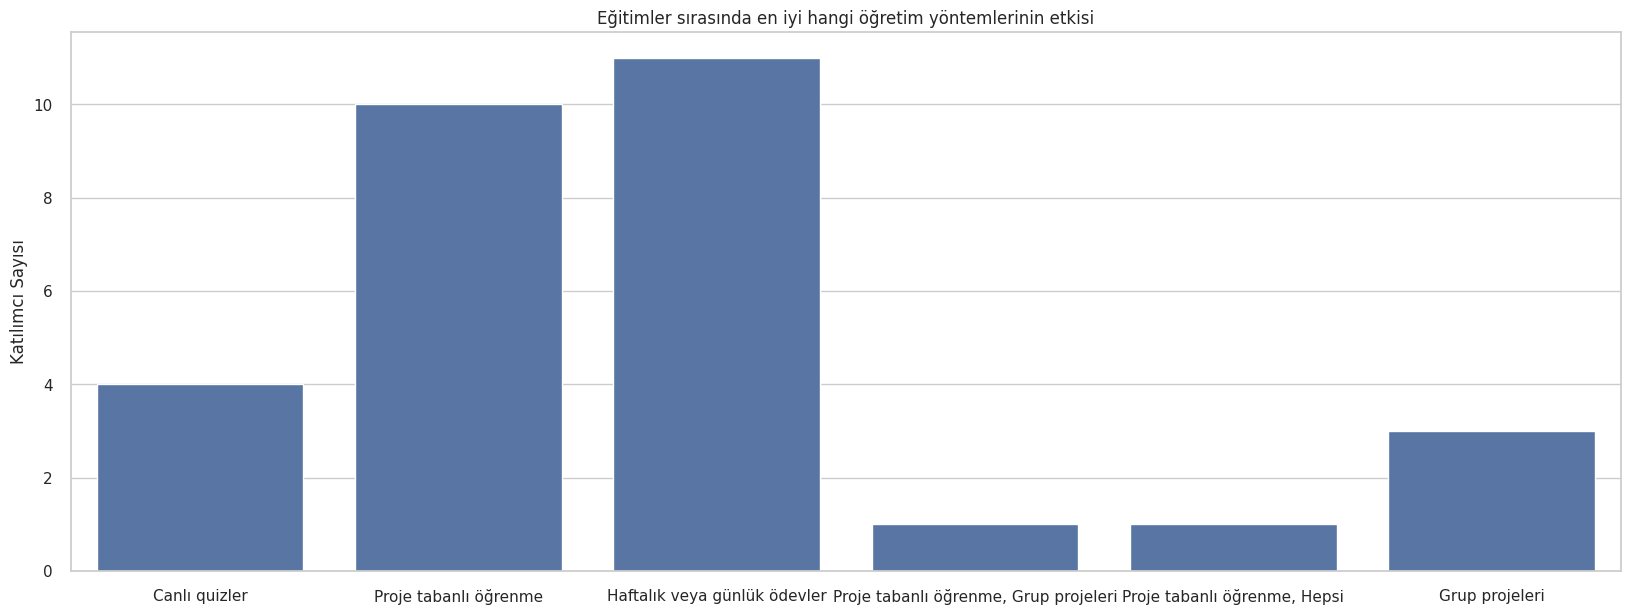

In [68]:
"""soru = 4 - Eğitimler sırasında en iyi hangi öğretim yöntemlerini daha etkili buluyorsunuz?"""
soru4 = df["soru4"].value_counts()

# Countplot oluştur
plt.figure(figsize=(20,7))
sns.countplot(x='soru4', data=df)
plt.title('Eğitimler sırasında en iyi hangi öğretim yöntemlerinin etkisi')
plt.xlabel('')
plt.ylabel('Katılımcı Sayısı')
plt.show()

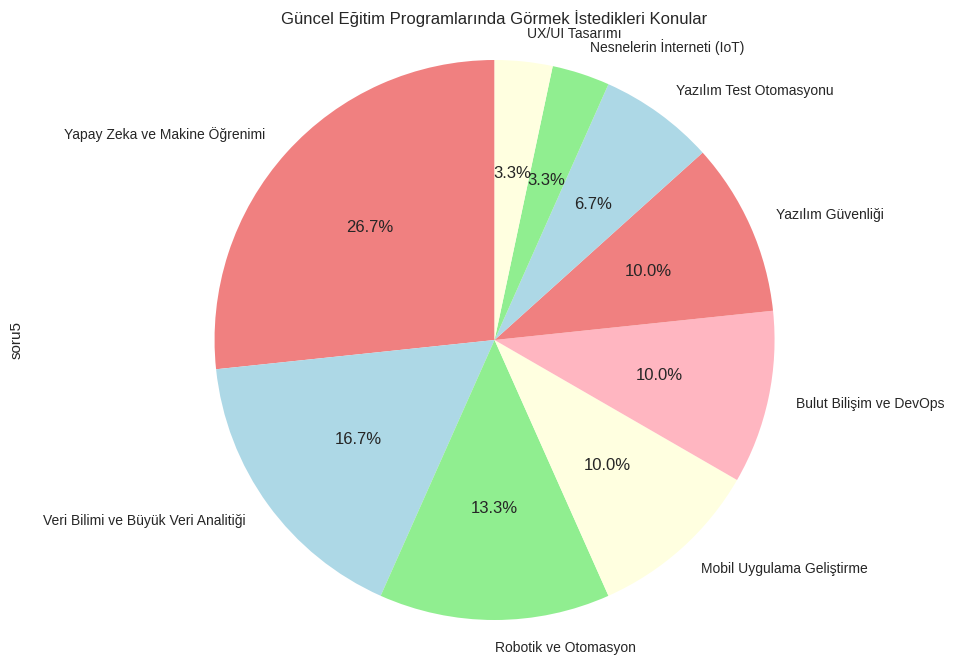

In [18]:
"""soru 5 =Neos Yazılım Akademisi'nin güncel eğitim programlarında görmek istediğiniz konular nelerdir? Lütfen aşağıda listeden en fazla üç konuyu seçin veya kendi önerilerinizi belirtin?"""
soru5 = df["soru5"].value_counts()
plt.figure(figsize=(12, 8))
soru5.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Güncel Eğitim Programlarında Görmek İstedikleri Konular')
plt.axis('equal')
plt.show()

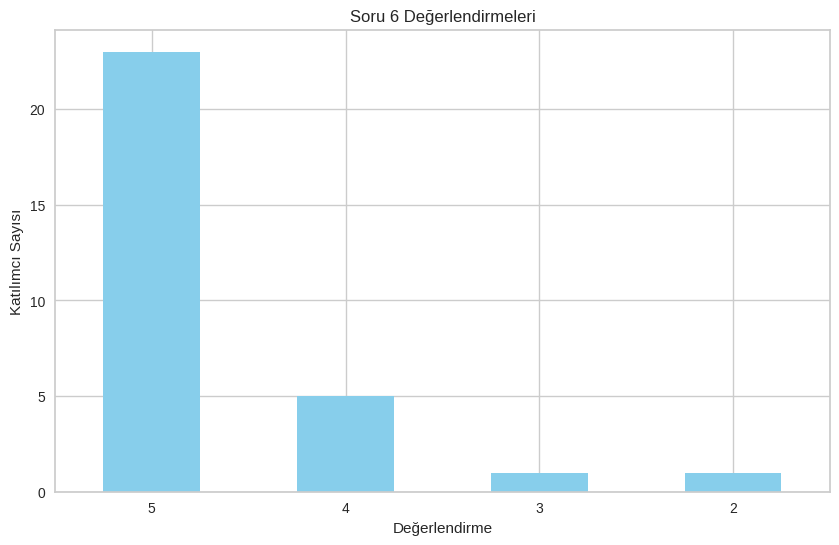

In [19]:
"""## soru 6 - Neos Yazılım Akademiden, aldığınız eğitim ile ilgili kaynak ,makale, kitap vb. olanakları fiziksel veya dijital olarak dağıtılması ne derece önemlidir?"""

soru6 = df["soru6"].value_counts()

plt.figure(figsize=(10, 6))
soru6.plot(kind='bar', color='skyblue')
plt.title('Soru 6 Değerlendirmeleri')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()

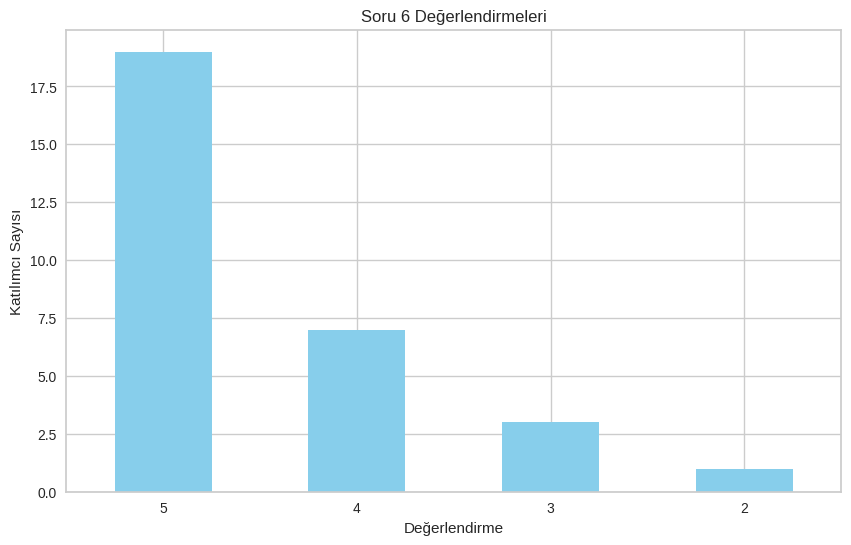

In [20]:
"""soru 7 = Chat GPT, Google Bard veya Gemini gibi chatbotlar ile geniş kapsamlı bir eğitim alınması ne kadar önemlidir ?"""

soru7 = df["soru7"].value_counts()
plt.figure(figsize=(10, 6))
soru7.plot(kind='bar', color='skyblue')
plt.title('Soru 6 Değerlendirmeleri')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()


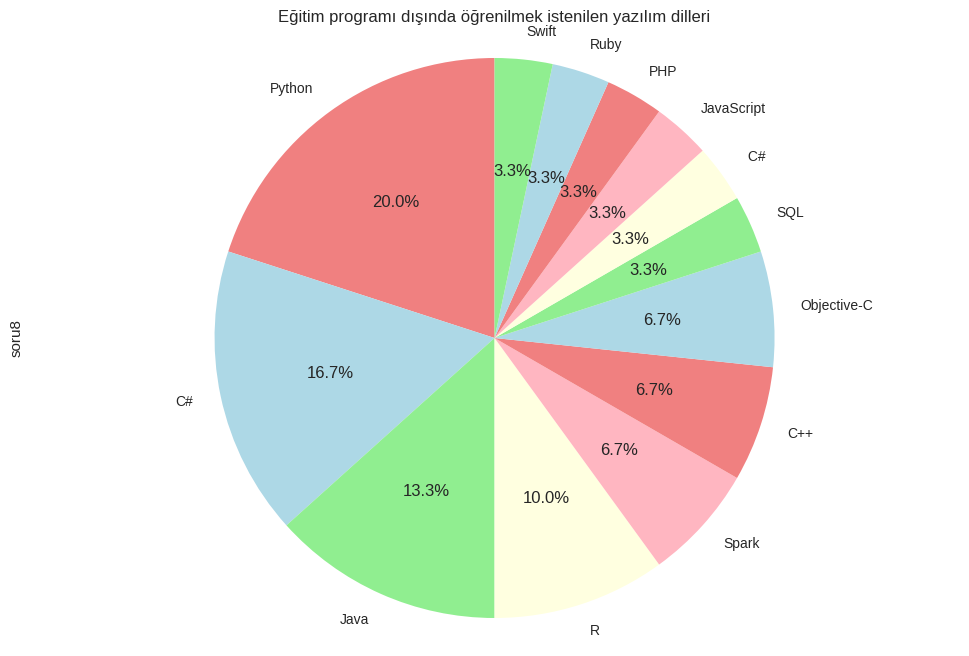

In [21]:
"""soru 8 = Eğitim programınızın dışında hangi yazılım dillerini öğrenmeyi düşünüyorsunuz?"""

soru8 = df["soru8"].value_counts()

plt.figure(figsize=(12, 8))
soru8.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Eğitim programı dışında öğrenilmek istenilen yazılım dilleri')
plt.axis('equal')
plt.show()

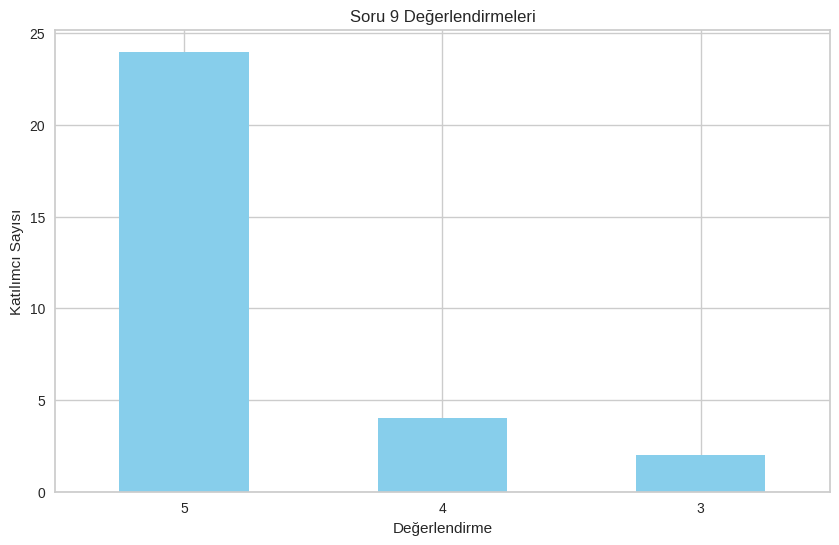

In [22]:
"""## soru 9 - Siber güvenlik, veri analitiği veya yapay zeka gibi özel konularda teknik workshoplar veya seminerler düzenlenmesi ne derece önemlidir ?"""

soru9 = df["soru9"].value_counts()


plt.figure(figsize=(10, 6))
soru9.plot(kind='bar', color='skyblue')
plt.title('Soru 9 Değerlendirmeleri')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()


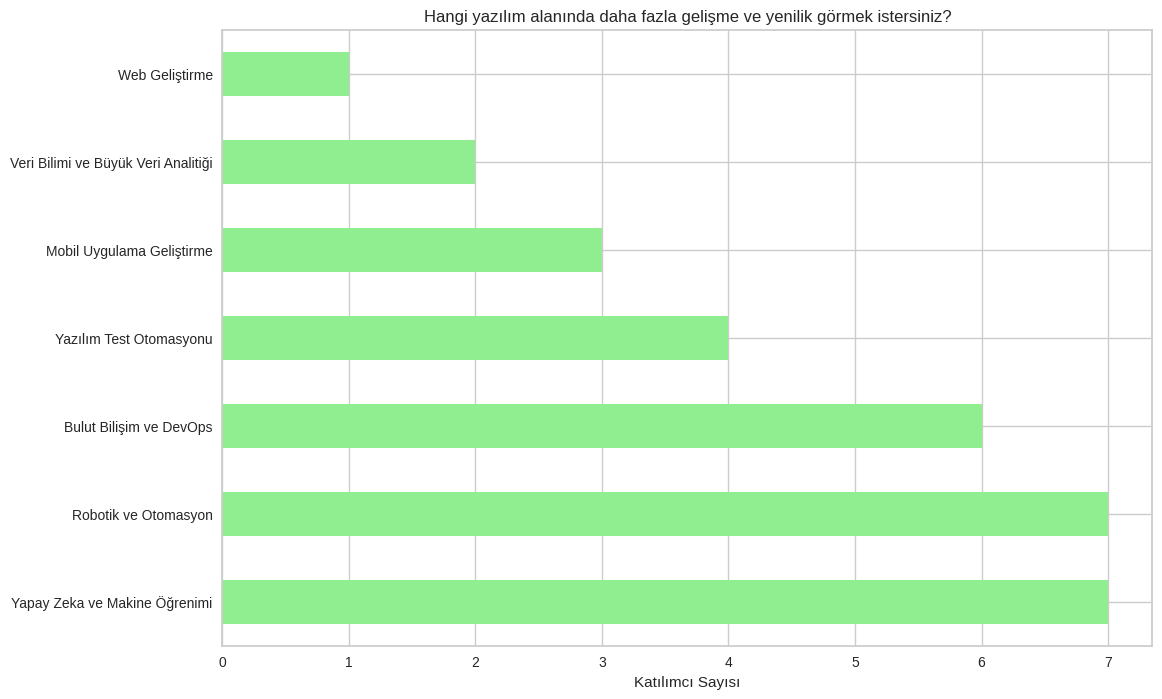

In [23]:
"""## soru 10 - Hangi yazılım alanında daha fazla gelişme ve yenilik görmek istersiniz?

"""

soru10 = df["soru10"].value_counts()

plt.figure(figsize=(12, 8))
soru10 .plot(kind='barh', color='lightgreen')
plt.title('Hangi yazılım alanında daha fazla gelişme ve yenilik görmek istersiniz?')
plt.xlabel('Katılımcı Sayısı')
plt.ylabel('')
plt.show()

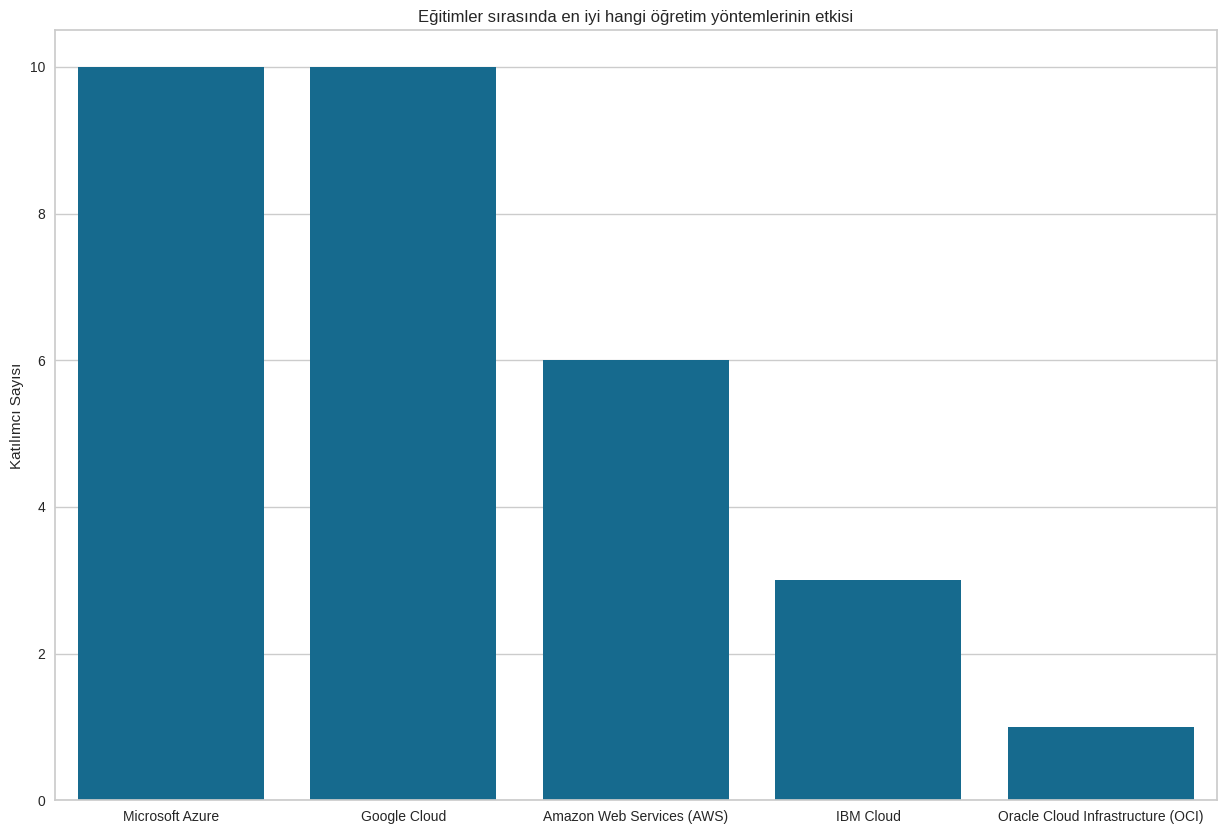

In [24]:
"""## soru 11 -Neos Yazılım Akademi’nin eğitim programlarında yapay zeka ,makine öğrenimi ve web geliştirme konularını ele alırken hangi teknolojilerin kullanmasını istersiniz?"""

soru11 = df["soru11"].value_counts()

plt.figure(figsize=(15, 10))
sns.countplot(x='soru11', data=df)
plt.title('Eğitimler sırasında en iyi hangi öğretim yöntemlerinin etkisi')
plt.xlabel('')
plt.ylabel('Katılımcı Sayısı')
plt.show()


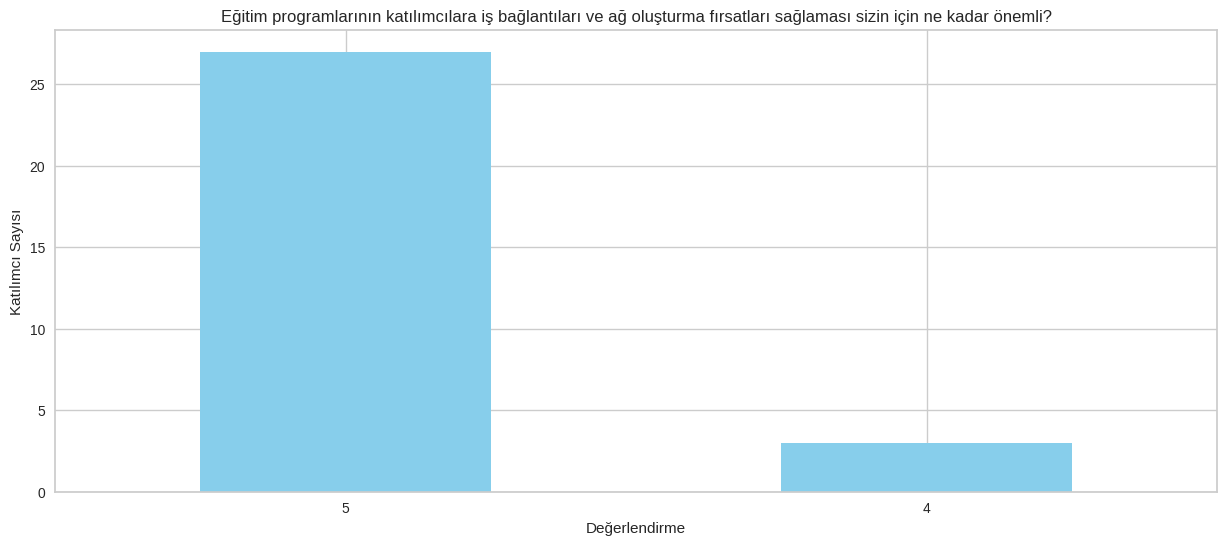

In [25]:
"""## soru 12 -Eğitim programlarının katılımcılara iş bağlantıları ve ağ oluşturma fırsatları sağlaması sizin için ne kadar önemli?"""

soru12 = df["soru12"].value_counts()

plt.figure(figsize=(15, 6))
soru12.plot(kind='bar', color='skyblue')
plt.title('Eğitim programlarının katılımcılara iş bağlantıları ve ağ oluşturma fırsatları sağlaması sizin için ne kadar önemli?')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()


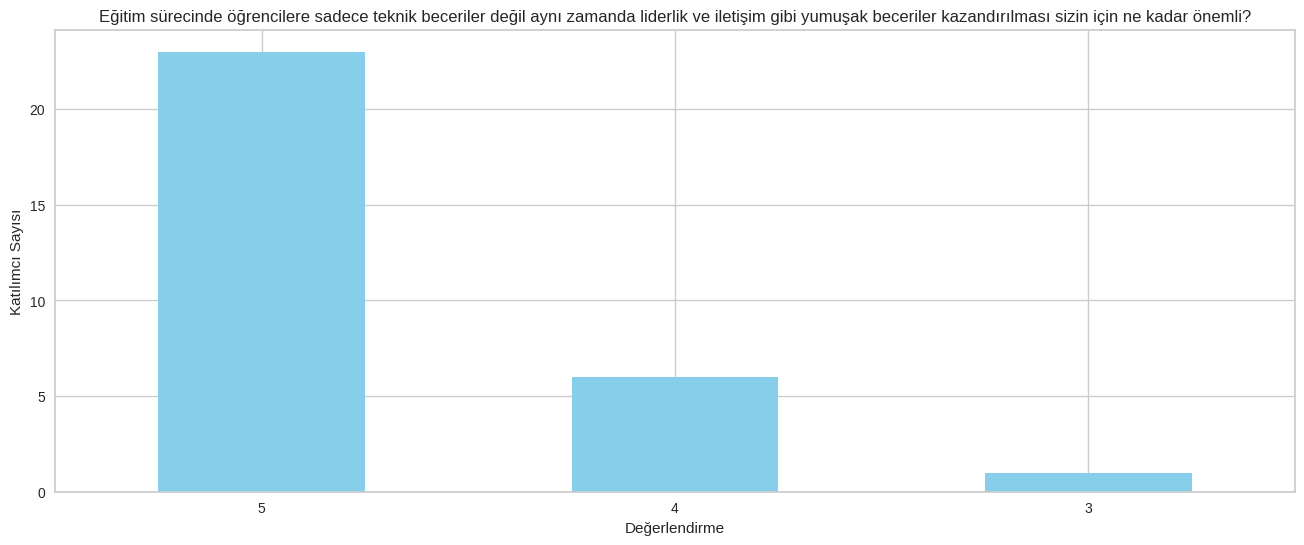

In [26]:
"""## soru 13 - Eğitim sürecinde öğrencilere sadece teknik beceriler değil aynı zamanda liderlik ve iletişim gibi yumuşak beceriler kazandırılması sizin için ne kadar önemli ?"""

soru13 = df["soru13"].value_counts()

plt.figure(figsize=(16, 6))
soru13.plot(kind='bar', color='skyblue')
plt.title('Eğitim sürecinde öğrencilere sadece teknik beceriler değil aynı zamanda liderlik ve iletişim gibi yumuşak beceriler kazandırılması sizin için ne kadar önemli?')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()

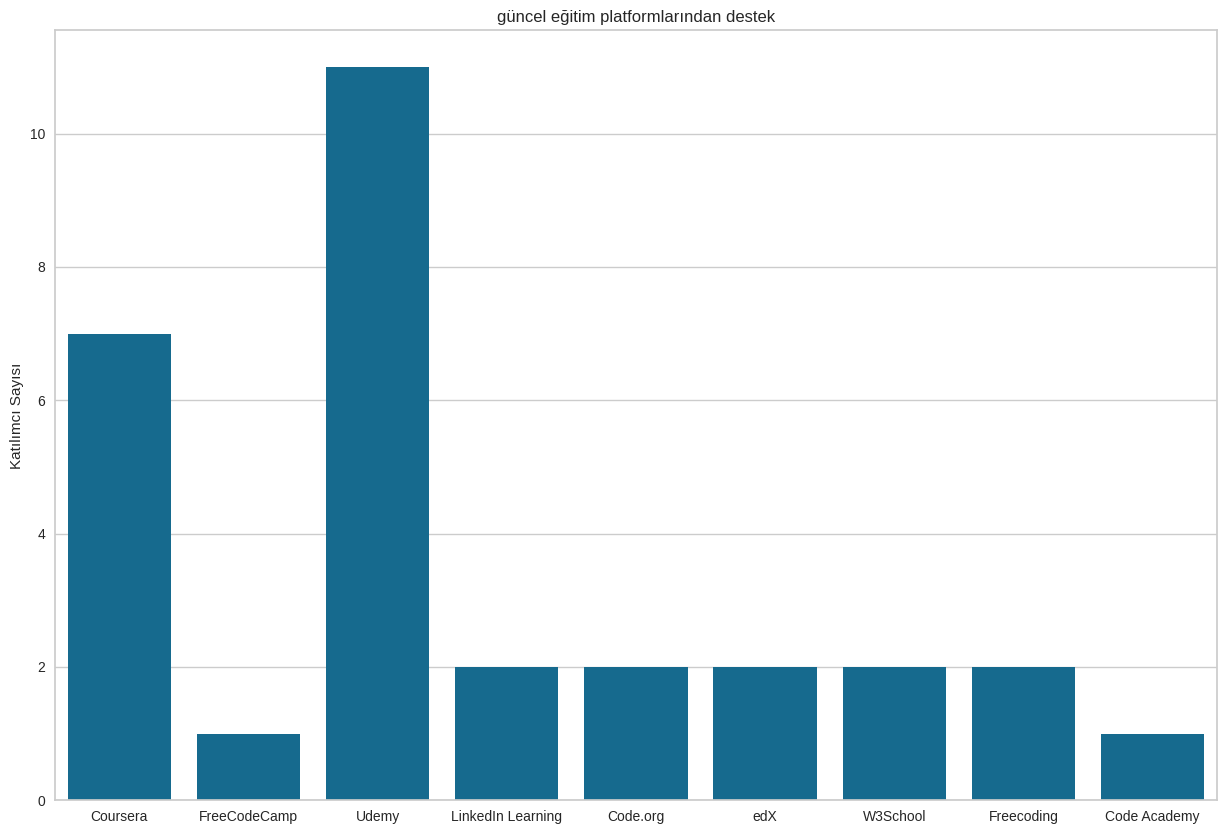

In [27]:
"""## soru 14 -Neos Yazılım Akademi dışında hangi güncel eğitim platformlarından destek alıyorsunuz?"""

soru14 = df["soru14"].value_counts()

plt.figure(figsize=(15, 10))
sns.countplot(x='soru14', data=df)
plt.title('güncel eğitim platformlarından destek')
plt.xlabel('')
plt.ylabel('Katılımcı Sayısı')
plt.show()


<ipython-input-28-d54326b4a355>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soru15_count.values, y=soru15_sorted, palette='viridis')


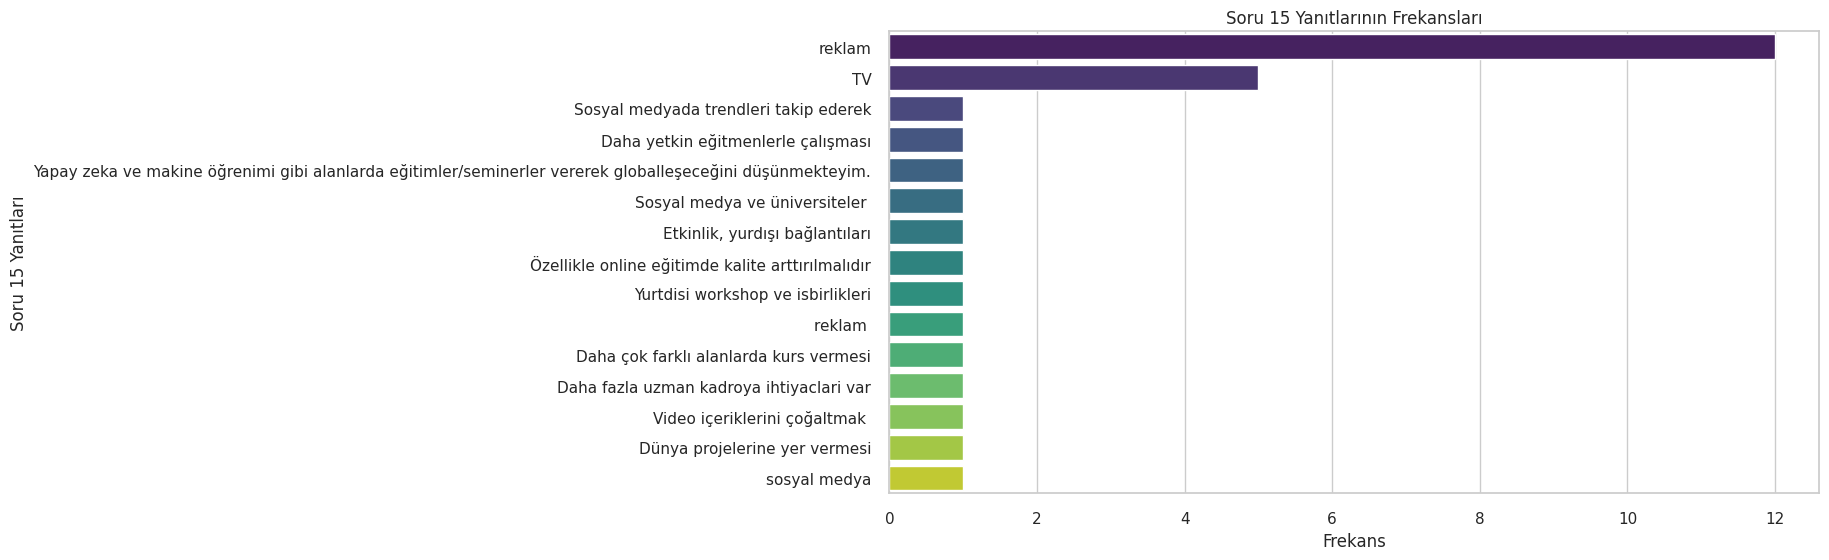

In [28]:
"""## soru 15 -Neos Yazılım Akademisi'nin global anlamda tanınması için nasıl bir yol izlemesi gereklidir?"""

soru15_count = df["soru15"].value_counts()

# Yanıtları frekanslarına göre sıralı bir liste haline getir
soru15_sorted = soru15_count.index.tolist()

# Yatay bar grafiği oluştur
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=soru15_count.values, y=soru15_sorted, palette='viridis')
plt.title('Soru 15 Yanıtlarının Frekansları')
plt.xlabel('Frekans')
plt.ylabel('Soru 15 Yanıtları')
plt.show()

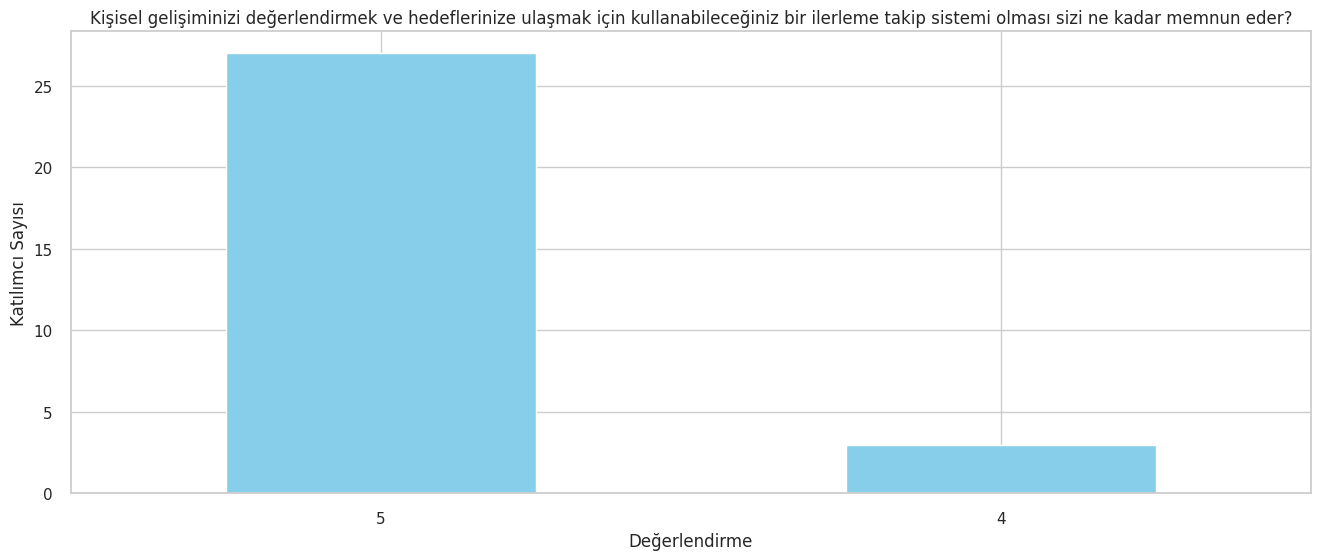

In [29]:
"""## soru 16 - Kişisel gelişiminizi değerlendirmek ve hedeflerinize ulaşmak için kullanabileceğiniz bir ilerleme takip sistemi olması sizi ne kadar memnun eder"""

soru16_count = df["soru16"].value_counts()

plt.figure(figsize=(16, 6))
soru16_count.plot(kind='bar', color='skyblue')
plt.title('Kişisel gelişiminizi değerlendirmek ve hedeflerinize ulaşmak için kullanabileceğiniz bir ilerleme takip sistemi olması sizi ne kadar memnun eder?')
plt.xlabel('Değerlendirme')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=0)  # x eksenindeki değerlerin yatay görünmesi için
plt.show()

In [30]:
df_num = df.select_dtypes(include=["float", "int"])

In [31]:
df_num.head()

,soru2,soru6,soru7,soru9,soru12,soru13,soru16
0,5,5,5,5,5,5,5
1,3,4,2,5,5,3,4
2,5,5,4,5,5,4,5
3,4,4,4,5,5,5,5
4,5,5,5,5,5,5,5


In [32]:
cor_matrix = df_num.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

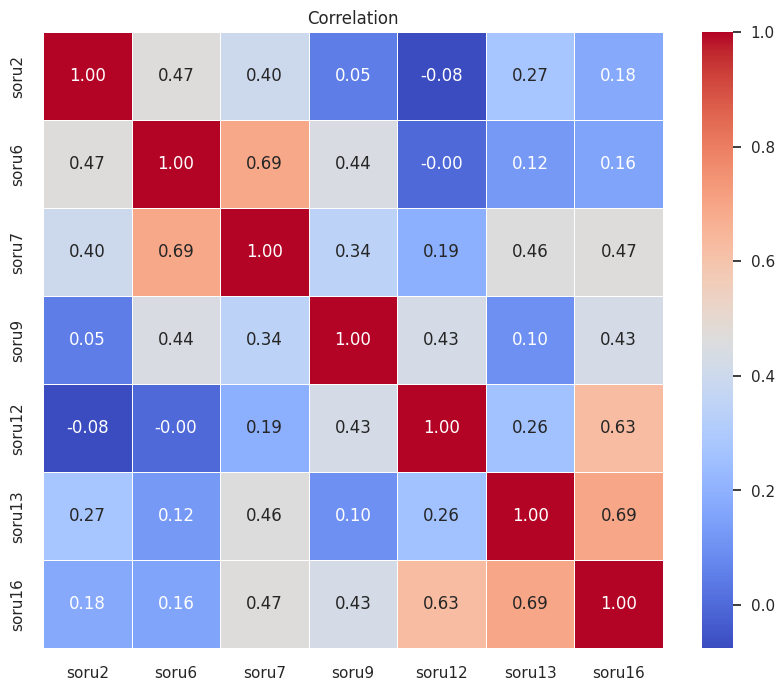

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Correlation')
plt.show

In [34]:
#kategorik değişken analizi
categorical_features = df.select_dtypes(include=['object']).columns

def cat_summary (dataframe, col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))

  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

for col in categorical_features:
    cat_summary(df,col)

                  soru1      Ratio
Lisans               16  53.333333
Ön lisans             9  30.000000
Doktora programı      2   6.666667
Yüksek lisans         2   6.666667
lisans                1   3.333333
                                       soru3      Ratio
Sosyal medya ve profesyonel ağlar          9  30.000000
Online kurslar ve eğitim platformları      7  23.333333
Kitaplar ve yayınlar                       6  20.000000
Konferansları ve etkinlikler               6  20.000000
 Sosyal medya ve profesyonel ağlar         1   3.333333
online kurslar ve eğitim platformları      1   3.333333
                                       soru4      Ratio
Haftalık veya günlük ödevler              11  36.666667
Proje tabanlı öğrenme                     10  33.333333
Canlı quizler                              4  13.333333
Grup projeleri                             3  10.000000
Proje tabanlı öğrenme, Grup projeleri      1   3.333333
Proje tabanlı öğrenme, Hepsi               1   3.333333
      

count    30.000000
mean      4.466667
std       0.899553
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru2, dtype: float64


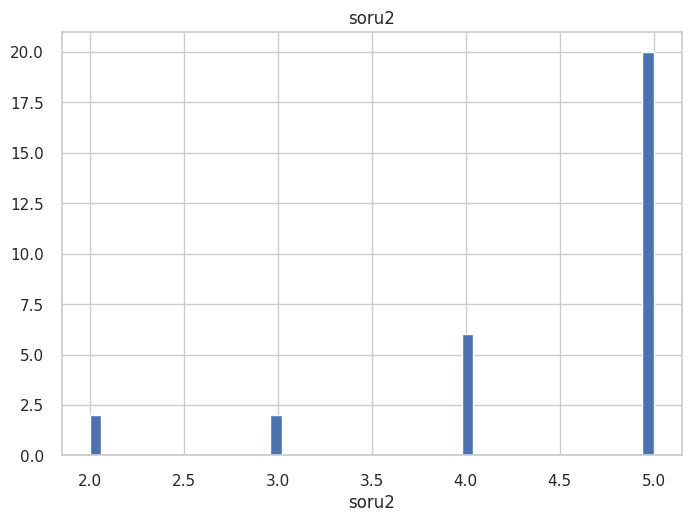

#####################################
count    30.000000
mean      4.666667
std       0.711159
min       2.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru6, dtype: float64


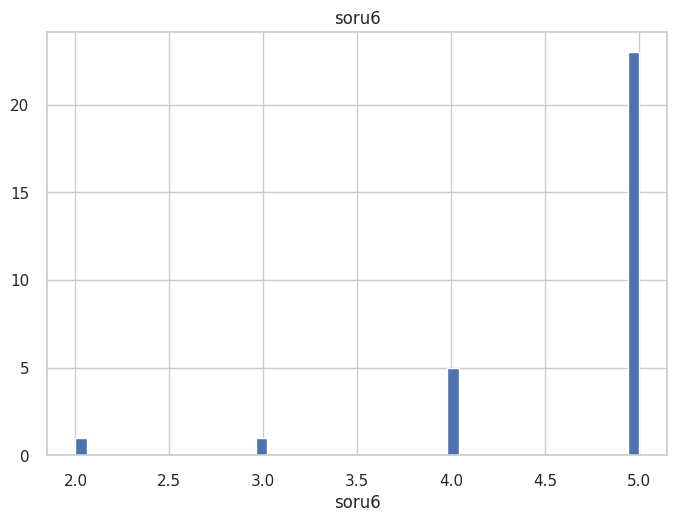

#####################################
count    30.000000
mean      4.466667
std       0.819307
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru7, dtype: float64


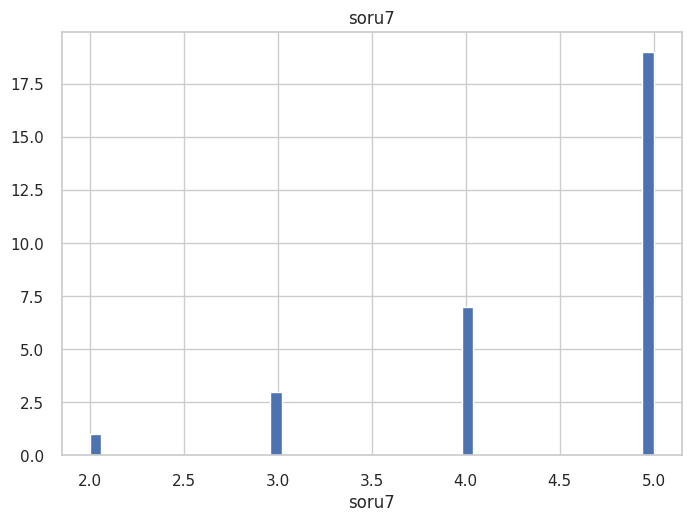

#####################################
count    30.000000
mean      4.733333
std       0.583292
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru9, dtype: float64


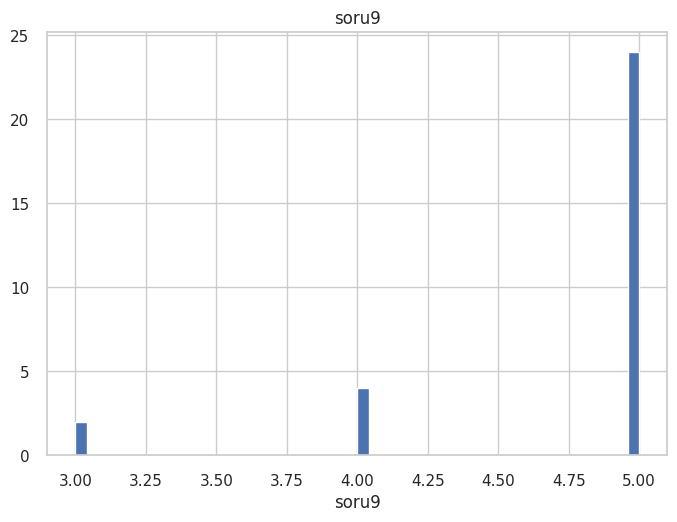

#####################################
count    30.000000
mean      4.900000
std       0.305129
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru12, dtype: float64


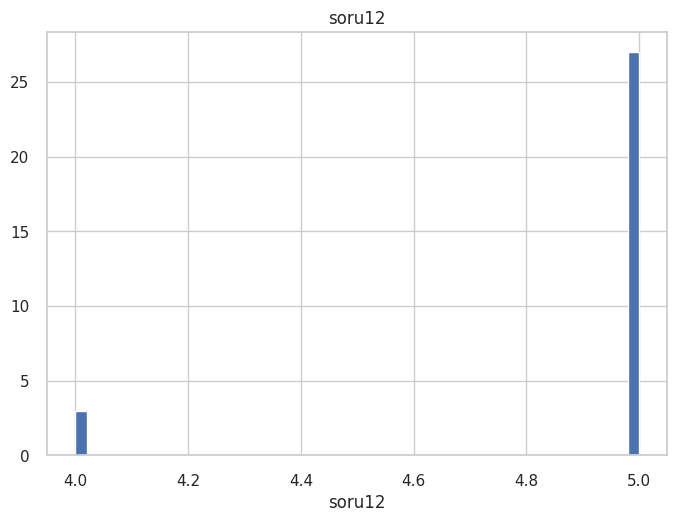

#####################################
count    30.000000
mean      4.733333
std       0.520830
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru13, dtype: float64


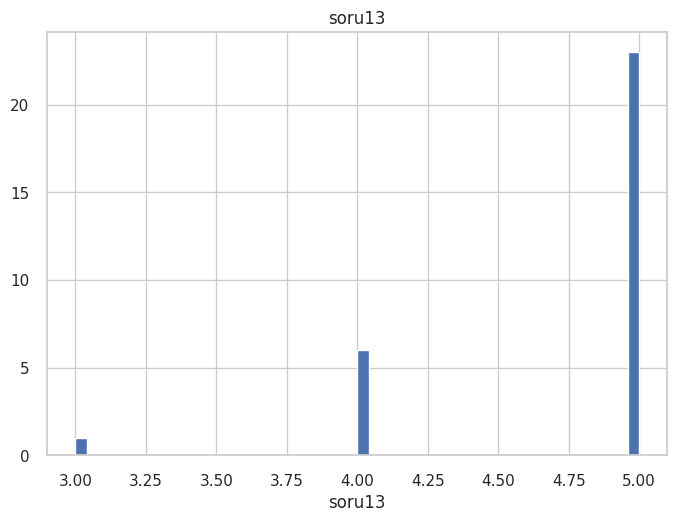

#####################################
count    30.000000
mean      4.900000
std       0.305129
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: soru16, dtype: float64


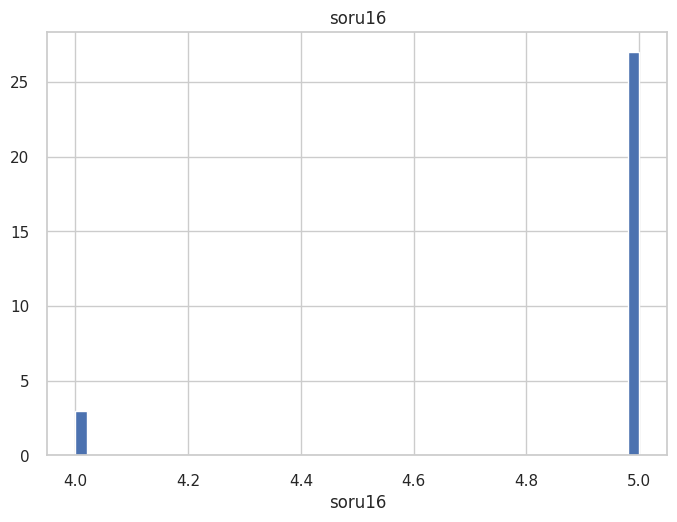

#####################################


In [35]:
#Sayısal değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.25,0.50,0.75]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in df_num:
    num_summary(df, col, True)

In [36]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   soru1   30 non-null     int64
 1   soru2   30 non-null     int64
 2   soru3   30 non-null     int64
 3   soru4   30 non-null     int64
 4   soru5   30 non-null     int64
 5   soru6   30 non-null     int64
 6   soru7   30 non-null     int64
 7   soru8   30 non-null     int64
 8   soru9   30 non-null     int64
 9   soru10  30 non-null     int64
 10  soru11  30 non-null     int64
 11  soru12  30 non-null     int64
 12  soru13  30 non-null     int64
 13  soru14  30 non-null     int64
 14  soru15  30 non-null     int64
 15  soru16  30 non-null     int64
dtypes: int64(16)
memory usage: 3.9 KB


In [38]:
sc = MinMaxScaler((0, 1))

In [39]:
df = sc.fit_transform(df)

In [40]:
df[0:7]

array([[0.75      , 1.        , 0.6       , 0.        , 0.75      ,
        1.        , 1.        , 0.83333333, 1.        , 0.16666667,
        0.75      , 1.        , 1.        , 0.25      , 0.42857143,
        1.        ],
       [0.25      , 0.33333333, 0.        , 0.6       , 0.75      ,
        0.66666667, 0.        , 0.58333333, 1.        , 0.16666667,
        0.25      , 1.        , 0.        , 0.375     , 0.78571429,
        0.        ],
       [0.        , 1.        , 0.8       , 0.4       , 1.        ,
        1.        , 0.66666667, 0.08333333, 1.        , 1.        ,
        0.        , 1.        , 0.5       , 0.75      , 0.07142857,
        1.        ],
       [1.        , 0.66666667, 1.        , 0.4       , 0.125     ,
        0.66666667, 0.66666667, 0.58333333, 1.        , 0.83333333,
        0.25      , 1.        , 1.        , 0.625     , 0.64285714,
        1.        ],
       [0.5       , 1.        , 0.2       , 0.6       , 0.375     ,
        1.        , 1.        , 

In [41]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
kmeans.get_params()


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [43]:
kmeans.n_clusters

4

In [44]:
kmeans.cluster_centers_

array([[0.51666667, 0.88888889, 0.54666667, 0.37333333, 0.675     ,
        1.        , 1.        , 0.42222222, 0.93333333, 0.32222222,
        0.58333333, 1.        , 1.        , 0.44166667, 0.62857143,
        1.        ],
       [0.3       , 0.53333333, 0.36      , 0.52      , 0.8       ,
        0.73333333, 0.46666667, 0.4       , 0.9       , 0.76666667,
        0.25      , 1.        , 0.6       , 0.575     , 0.42857143,
        0.8       ],
       [0.25      , 0.83333333, 0.4       , 0.3       , 0.5       ,
        0.83333333, 0.66666667, 0.66666667, 0.25      , 0.33333333,
        0.375     , 0.        , 0.5       , 0.625     , 0.53571429,
        0.        ],
       [0.625     , 0.875     , 0.65      , 0.5       , 0.15625   ,
        0.79166667, 0.75      , 0.45833333, 0.875     , 0.625     ,
        0.21875   , 0.875     , 0.875     , 0.734375  , 0.6875    ,
        1.        ]])

In [45]:
#hangi soru hangi kümede
kmeans.labels_

array([0, 1, 1, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 1, 0, 0, 3, 1, 0, 0], dtype=int32)

In [46]:
kmeans.inertia_

26.90355707908163

In [47]:
###### Optimum Küme Sayısının Belirlenmesi

kmeans = KMeans()
ssd = []
K = range(1, 30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

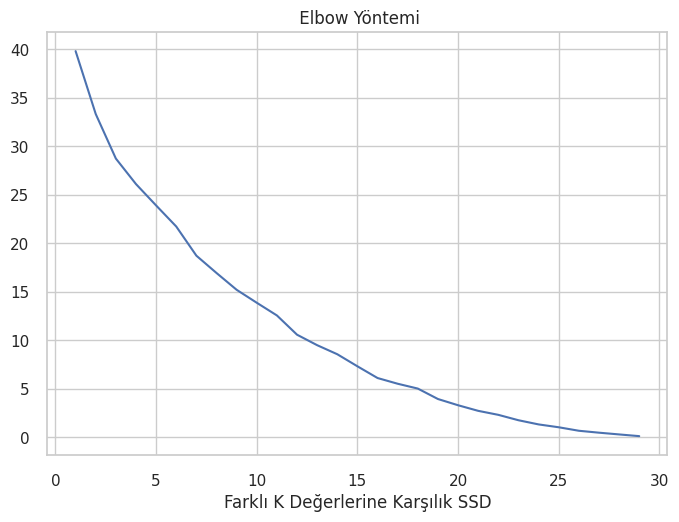

In [48]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSD")
plt.title(" Elbow Yöntemi")
plt.show(block=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

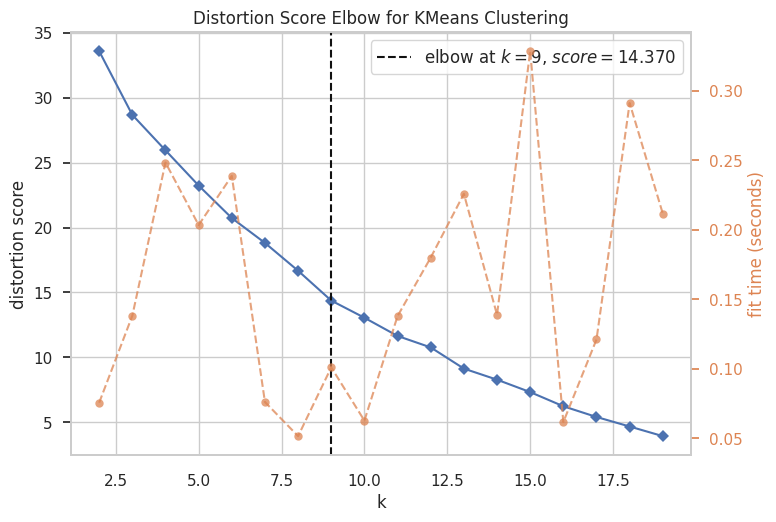

9

In [49]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show(block=True)
elbow.elbow_value_

In [50]:
#    ##### Final Cluster'ların Oluşturulması

In [51]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
kmeans.n_clusters

9

In [53]:
kmeans.cluster_centers_


array([[0.36111111, 0.92592593, 0.62222222, 0.48888889, 0.66666667,
        0.96296296, 0.96296296, 0.25      , 0.83333333, 0.53703704,
        0.66666667, 1.        , 1.        , 0.33333333, 0.76190476,
        1.        ],
       [0.75      , 0.83333333, 0.43333333, 0.26666667, 0.66666667,
        1.        , 1.        , 0.66666667, 1.        , 0.16666667,
        0.54166667, 1.        , 1.        , 0.60416667, 0.42857143,
        1.        ],
       [0.25      , 1.        , 0.2       , 0.        , 0.875     ,
        0.66666667, 0.33333333, 0.66666667, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.5       ,
        0.        ],
       [0.25      , 0.88888889, 0.8       , 0.33333333, 0.16666667,
        1.        , 0.88888889, 0.63888889, 1.        , 0.11111111,
        0.16666667, 1.        , 0.83333333, 0.91666667, 0.66666667,
        1.        ],
       [0.25      , 0.33333333, 0.        , 0.6       , 0.75      ,
        0.66666667, 0.        , 

In [54]:
kmeans.labels_

array([1, 4, 5, 6, 1, 0, 0, 8, 6, 6, 3, 0, 0, 6, 3, 1, 5, 7, 1, 1, 0, 2,
       0, 5, 1, 0, 3, 8, 0, 0], dtype=int32)

In [55]:
clusters_kmeans = kmeans.labels_


In [56]:
df = pd.read_excel('neosx.xlsx')

In [57]:
df["cluster"] = clusters_kmeans

In [58]:
df.head(30)

,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,soru11,soru12,soru13,soru14,soru15,soru16,cluster
0,lisans,5,Online kurslar ve eğitim platformları,Canlı quizler,Yapay Zeka ve Makine Öğrenimi,5,5,SQL,5,Mobil Uygulama Geliştirme,Microsoft Azure,5,5,Coursera,Sosyal medyada trendleri takip ederek,5,1
1,Lisans,3,Sosyal medya ve profesyonel ağlar,Proje tabanlı öğrenme,Yapay Zeka ve Makine Öğrenimi,4,2,Python,5,Mobil Uygulama Geliştirme,Google Cloud,5,3,FreeCodeCamp,reklam,4,4
2,Doktora programı,5,Sosyal medya ve profesyonel ağlar,Haftalık veya günlük ödevler,Yazılım Test Otomasyonu,5,4,C#,5,Yazılım Test Otomasyonu,Amazon Web Services (AWS),5,4,Udemy,Daha yetkin eğitmenlerle çalışması,5,5
3,Ön lisans,4,online kurslar ve eğitim platformları,Haftalık veya günlük ödevler,Mobil Uygulama Geliştirme,4,4,Python,5,Yapay Zeka ve Makine Öğrenimi,Google Cloud,5,5,LinkedIn Learning,Yapay zeka ve makine öğrenimi gibi alanlarda e...,5,6
4,Yüksek lisans,5,Kitaplar ve yayınlar,Proje tabanlı öğrenme,Robotik ve Otomasyon,5,5,Spark,5,Robotik ve Otomasyon,Microsoft Azure,5,5,Coursera,TV,5,1
5,Lisans,5,Sosyal medya ve profesyonel ağlar,"Proje tabanlı öğrenme, Grup projeleri",Nesnelerin İnterneti (IoT),4,4,Java,4,Yazılım Test Otomasyonu,Microsoft Azure,5,5,Udemy,reklam,5,0
6,Lisans,5,Online kurslar ve eğitim platformları,Proje tabanlı öğrenme,Yapay Zeka ve Makine Öğrenimi,5,5,C++,5,Robotik ve Otomasyon,Google Cloud,5,5,Code.org,Sosyal medya ve üniversiteler,5,0
7,Lisans,4,Kitaplar ve yayınlar,Canlı quizler,Bulut Bilişim ve DevOps,3,3,C#,4,Yapay Zeka ve Makine Öğrenimi,Amazon Web Services (AWS),5,5,Udemy,reklam,5,8
8,Ön lisans,5,Kitaplar ve yayınlar,"Proje tabanlı öğrenme, Hepsi",Bulut Bilişim ve DevOps,5,5,Java,5,Yapay Zeka ve Makine Öğrenimi,Amazon Web Services (AWS),5,5,Udemy,"Etkinlik, yurdışı bağlantıları",5,6
9,Ön lisans,5,Online kurslar ve eğitim platformları,Proje tabanlı öğrenme,Robotik ve Otomasyon,5,4,C#,5,Yapay Zeka ve Makine Öğrenimi,Google Cloud,4,5,Udemy,Özellikle online eğitimde kalite arttırılmalıdır,5,6


In [59]:
df["cluster"] = df["cluster"] + 1

In [60]:
df.groupby("cluster").agg(["count","mean","median"])

<ipython-input-60-f93d1d94d94e>:1: FutureWarning: ['soru1', 'soru3', 'soru4', 'soru5', 'soru8', 'soru10', 'soru11', 'soru14', 'soru15'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("cluster").agg(["count","mean","median"])


soru2                  soru6                  soru7                   \
        count      mean median count      mean median count      mean median   
cluster                                                                        
1           9  4.777778    5.0     9  4.888889    5.0     9  4.888889    5.0   
2           6  4.500000    5.0     6  5.000000    5.0     6  5.000000    5.0   
3           1  5.000000    5.0     1  4.000000    4.0     1  3.000000    3.0   
4           3  4.666667    5.0     3  5.000000    5.0     3  4.666667    5.0   
5           1  3.000000    3.0     1  4.000000    4.0     1  2.000000    2.0   
6           3  4.333333    5.0     3  5.000000    5.0     3  4.000000    4.0   
7           4  4.750000    5.0     4  4.500000    4.5     4  4.500000    4.5   
8           1  4.000000    4.0     1  5.000000    5.0     1  5.000000    5.0   
9           2  3.000000    3.0     2  2.500000    2.5     2  3.000000    3.0   

        soru9  ...        soru12              soru13                  soru16  \
        count  ... median  count  mean median  count      mean median  count   
cluster        ...                                                             
1           9  ...    5.0      9  5.00    5.0      9  5.000000    5.0      9   
2           6  ...    5.0      6  5.00    5.0      6  5.000000    5.0      6   
3           1  ...    3.0      1  4.00    4.0      1  4.000000    4.0      1   
4           3  ...    5.0      3  5.00    5.0      3  4.666667    5.0      3   
5           1  ...    5.0      1  5.00    5.0      1  3.000000    3.0      1   
6           3  ...    5.0      3  5.00    5.0      3  4.333333    4.0      3   
7           4  ...    5.0      4  4.75    5.0      4  4.750000    5.0      4   
8           1  ...    4.0      1  4.00    4.0      1  4.000000    4.0      1   
9           2  ...    4.0      2  5.00    5.0      2  5.000000    5.0      2   

                     
        mean median  
cluster              
1        5.0    5.0  
2        5.0    5.0  
3        4.0    4.0  
4        5.0    5.0  
5        4.0    4.0  
6        5.0    5.0  
7        5.0    5.0  
8        4.0    4.0  
9        5.0    5.0  

[9 rows x 21 columns]

In [61]:
df.to_csv("clusters.csv")

In [62]:
df["cluster"].value_counts

<bound method IndexOpsMixin.value_counts of 0     2
1     5
2     6
3     7
4     2
5     1
6     1
7     9
8     7
9     7
10    4
11    1
12    1
13    7
14    4
15    2
16    6
17    8
18    2
19    2
20    1
21    3
22    1
23    6
24    2
25    1
26    4
27    9
28    1
29    1
Name: cluster, dtype: int32>

In [63]:
#elbow yöntemi ile inertia skoru
kmeans.inertia_

14.589419485386745